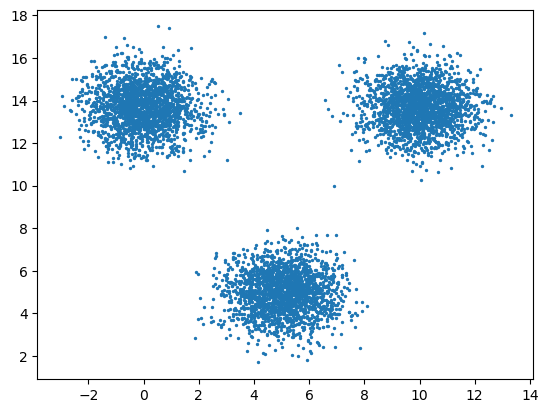

In [5]:
import os, sys
directory_path = os.path.dirname(os.path.abspath("__notebook__"))
sys.path.append('../../')
import numpy as np
np.random.seed(43)
import matplotlib.pyplot as plt
from models import rbm

def data():
    from math import sqrt
    cov = np.eye(2)
    samples_per_center = 2000
    n = lambda m: np.random.multivariate_normal(m, cov, samples_per_center)
    mean1 = (5, 5)
    mean2 = (10, 5+5*sqrt(3))
    mean3 = (0, 5+5*sqrt(3))
    X =  np.vstack((n(mean1), n(mean2), n(mean3)))
    np.random.shuffle(X)
    return X

X = data()
img = plt.scatter(x=X[:, 0], y=X[:, 1], s=2)

In [6]:
model = rbm.RBM(
    n_vis=2,
    n_hid=12
)
model.fit_autograd(
    X = X,
    n_gibbs=1,
    lr=0.01,
    n_epochs=400,
    batch_size=100,
    gamma=0.5,
    gamma_delay=100,
    rng_seed=0,
    verbose_interval=5,
    checkpoint_path=f'{directory_path}/rbm_checkpoints/presentation.pth'
)

epoch: 005 of 400 | cd_loss: 0.033 | recon_mse: 29.49 | kl_data_model: 0 | kl_model_data: 0
epoch: 010 of 400 | cd_loss: 0.005 | recon_mse: 30.264 | kl_data_model: 0 | kl_model_data: 0
epoch: 015 of 400 | cd_loss: -0.0 | recon_mse: 33.862 | kl_data_model: 0 | kl_model_data: 0
epoch: 020 of 400 | cd_loss: -0.004 | recon_mse: 41.667 | kl_data_model: 0 | kl_model_data: 0
epoch: 025 of 400 | cd_loss: -0.006 | recon_mse: 50.524 | kl_data_model: 0 | kl_model_data: 0
epoch: 030 of 400 | cd_loss: -0.004 | recon_mse: 35.744 | kl_data_model: 0 | kl_model_data: 0
epoch: 035 of 400 | cd_loss: -0.004 | recon_mse: 33.829 | kl_data_model: 0 | kl_model_data: 0
epoch: 040 of 400 | cd_loss: -0.006 | recon_mse: 30.441 | kl_data_model: 0 | kl_model_data: 0
epoch: 045 of 400 | cd_loss: -0.01 | recon_mse: 33.385 | kl_data_model: 0 | kl_model_data: 0
epoch: 050 of 400 | cd_loss: -0.009 | recon_mse: 29.029 | kl_data_model: 0 | kl_model_data: 0
epoch: 055 of 400 | cd_loss: -0.003 | recon_mse: 35.075 | kl_data_

TypeError: inverse_distance_sum() takes 1 positional argument but 2 were given

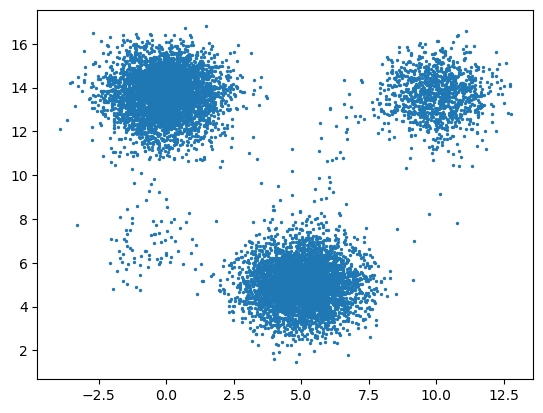

In [ ]:
model = rbm.load(f'{directory_path}/rbm_checkpoints/presentation.pth',
                f'{directory_path}/rbm_checkpoints/presentation.json')
samples = model.reconstruct(np.zeros((10000, 2)), n_gibbs=200)
plt.scatter(x=samples[:, 0], y=samples[:, 1], s=2)

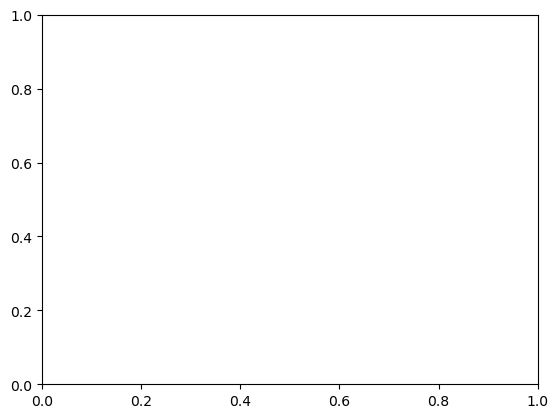

In [ ]:
current_axis = plt.gca()
for i in range(400):
    model = rbm.load(f'{directory_path}/rbm_checkpoints/presentation-{i}.pth',
                 f'{directory_path}/rbm_checkpoints/presentation-{i}.json')
    samples = model.reconstruct(np.zeros((10000, 2)), n_gibbs=200)
    current_axis.scatter(x=samples[:, 0], y=samples[:, 1], s=2)
    current_axis.set_xlim(-5, 15)
    current_axis.set_ylim(0, 20)
    plt.savefig(f'/tmp/pic/{i}.png')
    current_axis.clear()
None

# Turn png's into video

In [ ]:
import cv2
import os

# Directory containing PNG images
input_directory = '/tmp/pic'

# Output video file
output_video = '/tmp/output_video.mp4'

# Frame rate (adjust as needed)
frame_rate = 24

# Function to sort files numerically
def sort_files_numerically(files):
    return sorted(files, key=lambda x: int(x.split('.')[0]))

# Get the list of PNG files in the directory
png_files = [f for f in os.listdir(input_directory) if f.endswith('.png')]
png_files = sort_files_numerically(png_files)

# Read the first image to get dimensions
first_image = cv2.imread(os.path.join(input_directory, png_files[0]))
height, width, layers = first_image.shape

# Create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Specify the codec
video = cv2.VideoWriter(output_video, fourcc, frame_rate, (width, height))

# Write each frame to the video
for png_file in png_files:
    image_path = os.path.join(input_directory, png_file)
    frame = cv2.imread(image_path)
    video.write(frame)

# Release the VideoWriter object
video.release()

print(f"Video created: {output_video}")

Video created: /tmp/output_video.mp4
